Brainstorming about Capstone Project

In [1]:
!pip install xlrd

import numpy as np
import matplotlib.pyplot as plt
import PIL
import requests
import seaborn as sns
import pandas as pd
import scipy
import os
from glob import glob

In [2]:
os.getcwd()

'/Users/christineromano/DSI_Course/DSI_Capstone_Project/Exploratory_Data_Analyses'

In [3]:
os.listdir()

['category_vs_counts.png',
 'DS6_Capstone_Brainstorm_1b.ipynb',
 'Min_Delay_per_Direction_11052025.png',
 'minute delayed by date.png',
 'Min_Delay_per_Line_11052025.png',
 'Min_Delay_per_Incident_11052025.png',
 'minute delayed by hour of day.png',
 'image (4).png',
 'average delayed by hour of day.png',
 'minute delayed by month.png',
 'average delayed by date.png',
 'image (3).png',
 'image (2).png',
 'Mean_Min_Delay_per_Direction_11062025.png',
 'image (1).png',
 'average delayed by month.png',
 'minute delayed by season.png',
 'DS6_Capstone_Brainstorm_2.ipynb',
 'Mean_Min_Delay_per_Incident_11062025.png',
 'average delayed by season.png',
 'DS6_Capstone_Brainstorm_1.ipynb',
 'Pairplots_with_NM_Dataset_11052025.png',
 'image.png']

In [4]:
os.chdir('/Users/christineromano/DSI_Course/DSI_Capstone_Project/')

In [5]:
streetcar_delay_df = pd.read_excel('ttc-streetcar-delay-data-2024_location_cleaning.xlsx', index_col=None)

In [6]:
streetcar_delay_df.head()

,Date,Line,Time,Day,Location,Incident,Min Delay,Min Gap,Bound,Vehicle
0,2024-01-01,301,07:44,Monday,QUEEN AND WOODBINE,Security,25,0,E,8801
1,2024-01-01,501,14:26,Monday,YORK AND WELLINGTON,Security,5,15,N,4572
2,2024-01-01,501,15:48,Monday,WOLSELEY LOOP,Mechanical,6,12,W,8326
3,2024-01-01,501,05:09,Monday,RONCESVALLES YARD,General Delay,3,13,W,4416
4,2024-01-01,501,04:54,Monday,RONCESVALLES YARD,General Delay,15,30,W,4411


In [7]:
streetcar_delay_df.columns

Index(['Date', 'Line', 'Time', 'Day', 'Location', 'Incident', 'Min Delay',
       'Min Gap', 'Bound', 'Vehicle'],
      dtype='object')

In [8]:
streetcar_delay_df_rename_columns = streetcar_delay_df.rename(columns = {0:'Date', 1: 'Line', 2:'Time', 3:'Day', 4:'Location', 5:'Incident', 6:'Min Delay', 7:'Min Gap', 8:'Bound', 9:'Vehicle'}).drop(index = 0)

In [9]:
streetcar_delay_df_rename_columns.head()

,Date,Line,Time,Day,Location,Incident,Min Delay,Min Gap,Bound,Vehicle
1,2024-01-01,501,14:26,Monday,YORK AND WELLINGTON,Security,5,15,N,4572
2,2024-01-01,501,15:48,Monday,WOLSELEY LOOP,Mechanical,6,12,W,8326
3,2024-01-01,501,05:09,Monday,RONCESVALLES YARD,General Delay,3,13,W,4416
4,2024-01-01,501,04:54,Monday,RONCESVALLES YARD,General Delay,15,30,W,4411
5,2024-01-01,501,04:57,Monday,RONCESVALLES YARD,General Delay,7,13,NaN,4450


<Axes: xlabel='Vehicle', ylabel='Incident'>

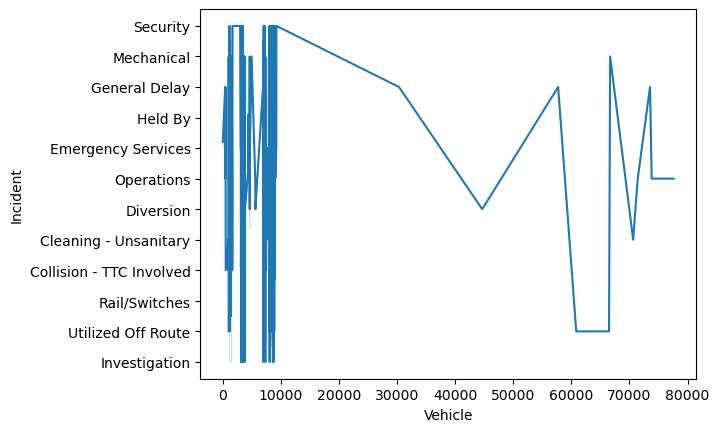

In [10]:
sns.lineplot(data = streetcar_delay_df_rename_columns,
             x = 'Vehicle', 
             y = 'Incident')

In [11]:
streetcar_delay_df_rename_columns.sort_values(by = 'Vehicle').tail(10)

,Date,Line,Time,Day,Location,Incident,Min Delay,Min Gap,Bound,Vehicle
1737,2024-02-10,504,16:05,Saturday,DUNDAS WEST STATION,Diversion,10,34,W,44658
2234,2024-02-21,506,04:43,Wednesday,LESLIE BARNS,General Delay,4,24,E,57724
1654,2024-02-08,501,06:54,Thursday,MUNRO AND GERRARD,Utilized Off Route,0,0,NaN,60841
13175,2024-12-02,508,17:39,Monday,KING AND SHAW,Utilized Off Route,20,40,W,66485
7620,2024-07-03,510,10:51,Wednesday,SPADINA AND COLLEGE,Mechanical,4,8,N,66674
1070,2024-01-25,503,15:17,Thursday,SPADINA AND KING,Cleaning - Unsanitary,10,20,S,70641
14069,2024-12-27,510,21:58,Friday,SPADINA AND NASSAU,Operations,10,20,N,71426
1629,2024-02-07,510,18:13,Wednesday,UNION STATION,General Delay,8,18,N,73545
12809,2024-11-22,508,14:58,Friday,RONCESVALLES YARD,Operations,20,20,NaN,73827
1859,2024-02-13,501,13:47,Tuesday,SPADINA AND QUEEN,Operations,8,16,E,77624


In [12]:
streetcar_delay_df_rename_columns.columns

Index(['Date', 'Line', 'Time', 'Day', 'Location', 'Incident', 'Min Delay',
       'Min Gap', 'Bound', 'Vehicle'],
      dtype='object')

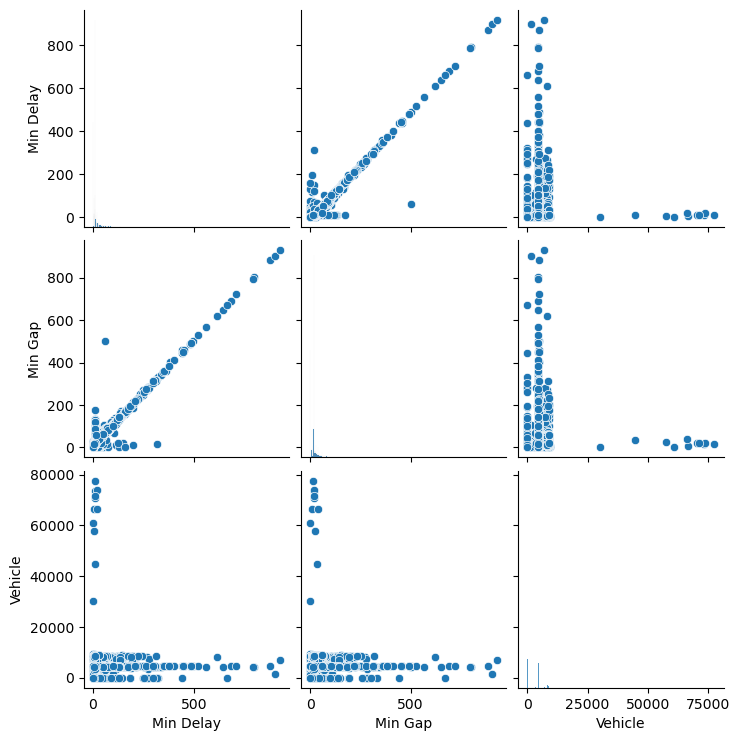

In [13]:
sns.pairplot(streetcar_delay_df_rename_columns)

In [14]:
streetcar_delay_df_rename_columns.to_csv('2024_Streetcar_Delay_Columns_Renamed.csv')

In [15]:
print(streetcar_delay_df_rename_columns['Incident'].unique())

['Security' 'Mechanical' 'General Delay' 'Held By' 'Emergency Services'
 'Operations' 'Diversion' 'Cleaning - Unsanitary'
 'Collision - TTC Involved' 'Rail/Switches' 'Utilized Off Route'
 'Investigation' 'Overhead']


In [16]:
print(streetcar_delay_df_rename_columns['Incident'].nunique())

13


In [17]:
print(streetcar_delay_df_rename_columns['Vehicle'].unique())

[4572 8326 4416 ... 8920 3261 3478]


In [18]:
print(streetcar_delay_df_rename_columns['Vehicle'].nunique())

1176


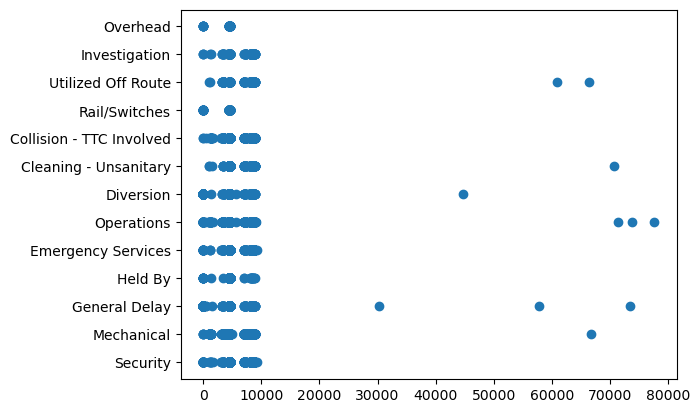

In [19]:

x1 = streetcar_delay_df_rename_columns['Vehicle']
x2 = streetcar_delay_df_rename_columns['Location']
y = streetcar_delay_df_rename_columns['Incident']

plt.scatter(x1, y)

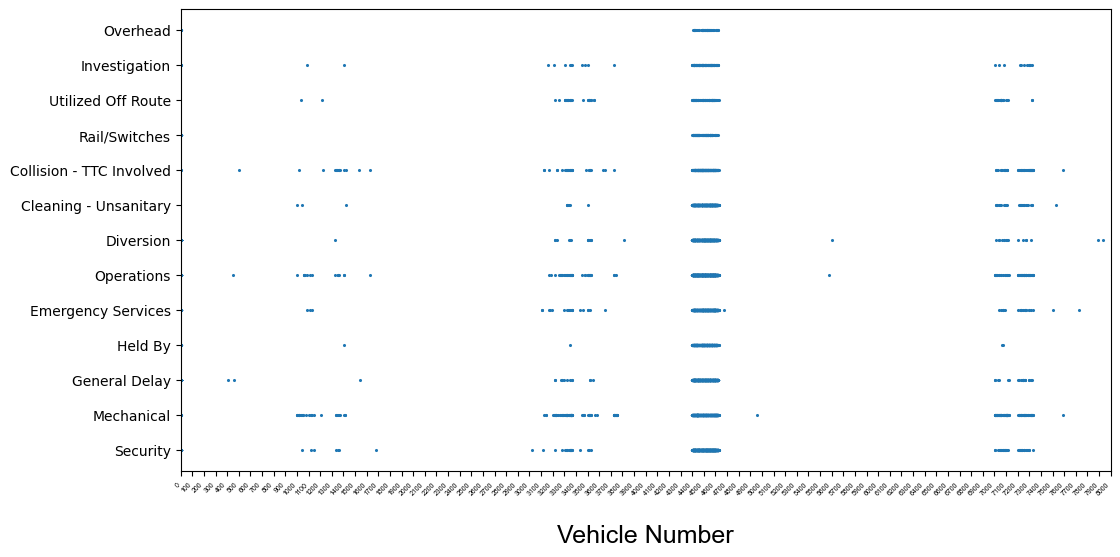

In [20]:
font1 = {'family' : 'Arial', 'color': 'Black'} # Need to use a font dictionary to change title of graph.

fig, ax = plt.subplots(figsize = (12, 6)) 

x1 = streetcar_delay_df_rename_columns['Vehicle']
x2 = streetcar_delay_df_rename_columns['Location']
y = streetcar_delay_df_rename_columns['Incident']
plt.xlabel('Vehicle Number', fontsize = 18, fontdict = font1, color = 'Black', labelpad=20)
plt.xlim(0, 8000)
ax.xaxis.set_major_locator(plt.MultipleLocator(100)) # Setting y axis tick marks every 10,000 units
plt.xticks(rotation = 45, ha= 'right', fontsize = 5, fontname = 'Arial') # Customizing labels of x axis
plt.scatter(x1, y, marker = '.', s = 6)
plt.show()

In [21]:
# Count sum of type of incidents per streetcar

No_Incident_Type_per_Vehicle = streetcar_delay_df_rename_columns.groupby(['Vehicle','Incident']).size().reset_index()
No_Incident_Type_per_Vehicle.head()

,Vehicle,Incident,0
0,0,Collision - TTC Involved,2
1,0,Diversion,200
2,0,Emergency Services,28
3,0,General Delay,289
4,0,Held By,11


In [22]:
No_Incident_Type_per_Vehicle.columns

Index(['Vehicle', 'Incident', 0], dtype='object')

In [23]:
# Renaming the final column.  Challenging to do for an object as opposed to a number or string.

Column_list_1 = list(No_Incident_Type_per_Vehicle.columns)
Column_list_1[2] = 'Number of Incidents'
No_Incident_Type_per_Vehicle.columns = Column_list_1
No_Incident_Type_per_Vehicle.head()

,Vehicle,Incident,Number of Incidents
0,0,Collision - TTC Involved,2
1,0,Diversion,200
2,0,Emergency Services,28
3,0,General Delay,289
4,0,Held By,11


In [24]:
No_Incident_Type_per_Vehicle.columns

Index(['Vehicle', 'Incident', 'Number of Incidents'], dtype='object')

In [25]:
df_wide = No_Incident_Type_per_Vehicle.pivot(index='Vehicle', 
                                    columns='Incident', 
                                    values='Number of Incidents').fillna(0)

print(df_wide.head())

Incident  Cleaning - Unsanitary  Collision - TTC Involved  Diversion  \
Vehicle                                                                
0                           0.0                       2.0      200.0   
403                         0.0                       0.0        0.0   
453                         0.0                       0.0        0.0   
461                         0.0                       0.0        0.0   
504                         0.0                       1.0        0.0   

Incident  Emergency Services  General Delay  Held By  Investigation  \
Vehicle                                                               
0                       28.0          289.0     11.0            3.0   
403                      0.0            1.0      0.0            0.0   
453                      0.0            0.0      0.0            0.0   
461                      0.0            1.0      0.0            0.0   
504                      0.0            0.0      0.0            0.0  

In [26]:
df_wide.index = df_wide.index.astype(str) # Convert index to a string so it will be treated as a categorical variable

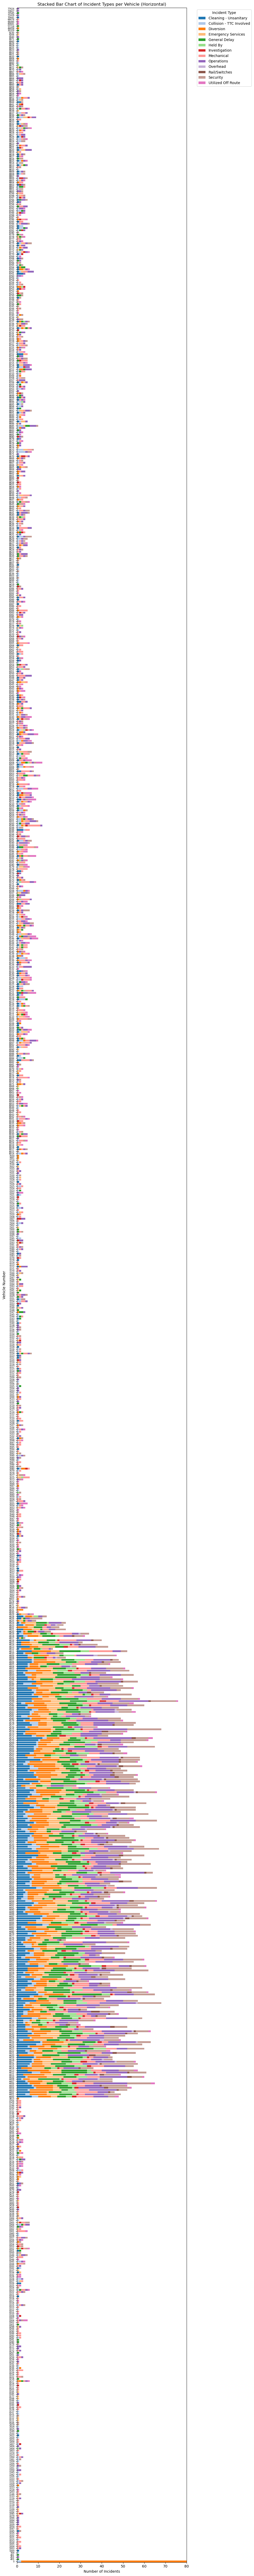

In [27]:
fig, ax = plt.subplots(figsize=(10, 100))

# Track cumulative values for stacking
left = pd.Series([0]*len(df_wide), index=df_wide.index)

colors = plt.cm.tab20.colors

# Loop through incident types
for i, incident in enumerate(df_wide.columns):
    ax.barh(df_wide.index, df_wide[incident],
            left=left,
            label=incident,
            color=colors[i % len(colors)])
    left += df_wide[incident]

# Labels and legend
ax.set_ylabel('Vehicle Number')
ax.set_xlabel('Number of Incidents')
ax.set_title('Stacked Bar Chart of Incident Types per Vehicle (Horizontal)')
ax.legend(title='Incident Type', bbox_to_anchor=(1.05, 1), loc='upper left')

ax.tick_params(axis='y', labelsize=6)

plt.xlim(0, 80)
ax.margins(y=0) 

plt.tight_layout()
plt.show()

In [28]:
# Count sum of type of incidents per streetcar

No_Incident_Type_per_Location = streetcar_delay_df_rename_columns.groupby(['Location','Incident']).size().reset_index()
No_Incident_Type_per_Location.head(40)

,Location,Incident,0
0,AND DEER PARK,Operations,1
1,AND EARLS COU,Collision - TTC Involved,1
2,AND GLENHOLME,Mechanical,1
3,AND KEELE,Operations,1
4,AND OAKWOOD,General Delay,1
5,AND WARREN,General Delay,1
6,AND YONGE (IN,Collision - TTC Involved,1
7,STATION,General Delay,1
8,STATION,Security,1
9,10 LAKE SHORE BLVD WES,Cleaning - Unsanitary,1


In [29]:
print(No_Incident_Type_per_Location['Location'].unique())

[' AND DEER PARK' ' AND EARLS COU' ' AND GLENHOLME' ... 'YORK AND YONGE'
 'YORK UNIVERSITY BUS WA' 'YORKDALE STATION']


In [30]:
print(No_Incident_Type_per_Location['Location'].nunique())

1610


In [31]:
List_of_Locations = No_Incident_Type_per_Location['Location'].unique()
print(List_of_Locations)

[' AND DEER PARK' ' AND EARLS COU' ' AND GLENHOLME' ... 'YORK AND YONGE'
 'YORK UNIVERSITY BUS WA' 'YORKDALE STATION']


In [32]:
print(No_Incident_Type_per_Location.columns)

Index(['Location', 'Incident', 0], dtype='object')


In [33]:
Column_list_2 = list(No_Incident_Type_per_Location.columns)
Column_list_2[2] = 'Number of Incidents'
No_Incident_Type_per_Location.columns = Column_list_2
No_Incident_Type_per_Location.head()

,Location,Incident,Number of Incidents
0,AND DEER PARK,Operations,1
1,AND EARLS COU,Collision - TTC Involved,1
2,AND GLENHOLME,Mechanical,1
3,AND KEELE,Operations,1
4,AND OAKWOOD,General Delay,1


In [34]:
df_wide_location = No_Incident_Type_per_Location.pivot(index='Location', 
                                    columns='Incident', 
                                    values='Number of Incidents').fillna(0)

print(df_wide_location.head())

Incident       Cleaning - Unsanitary  Collision - TTC Involved  Diversion  \
Location                                                                    
AND DEER PARK                    0.0                       0.0        0.0   
AND EARLS COU                    0.0                       1.0        0.0   
AND GLENHOLME                    0.0                       0.0        0.0   
AND KEELE                        0.0                       0.0        0.0   
AND OAKWOOD                      0.0                       0.0        0.0   

Incident       Emergency Services  General Delay  Held By  Investigation  \
Location                                                                   
AND DEER PARK                 0.0            0.0      0.0            0.0   
AND EARLS COU                 0.0            0.0      0.0            0.0   
AND GLENHOLME                 0.0            0.0      0.0            0.0   
AND KEELE                     0.0            0.0      0.0            0.0   
AND 

In [35]:
df_wide.index = df_wide.index.astype(str) # Convert index to string so it will be treated as a categorical variable

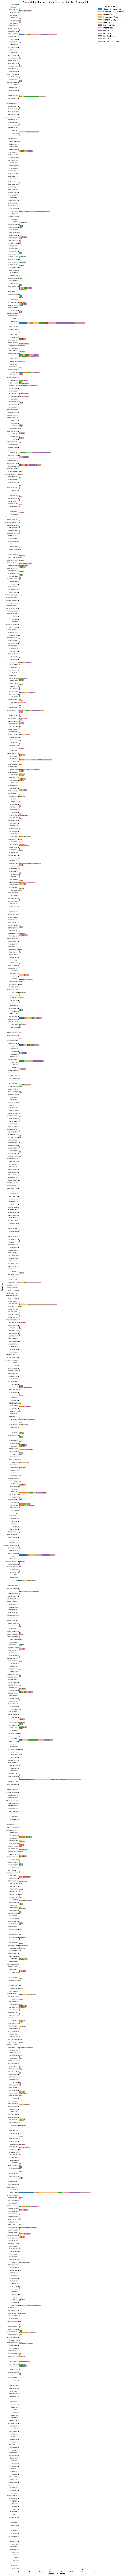

In [ ]:
'''fig, ax = plt.subplots(figsize=(10, 200))

# Track cumulative values for stacking
left = pd.Series([0]*len(df_wide_location), index=df_wide_location.index)

colors = plt.cm.tab20.colors

# Loop through incident types
for i, incident in enumerate(df_wide_location.columns):
    ax.barh(df_wide_location.index, df_wide_location[incident],
            left=left,
            label=incident,
            color=colors[i % len(colors)])
    left += df_wide_location[incident]

# Labels and legend
ax.set_ylabel('Location')
ax.set_xlabel('Number of Incidents')
ax.set_title('Stacked Bar Chart of Incident Types per Location (Horizontal)')
ax.legend(title='Incident Type', bbox_to_anchor=(1.05, 1), loc='upper left')

ax.tick_params(axis='y', labelsize=4)

plt.xlim(0, 350)
ax.margins(y=0) 

plt.tight_layout()
plt.show()'''

In [37]:
Location_Counts = streetcar_delay_df_rename_columns.groupby(['Location']).size().reset_index()
Location_Counts.tail(40)
Location_Counts_Sorted = Location_Counts.sort_values(by = 0)
print(Location_Counts_Sorted.loc[Location_Counts_Sorted[0] == 1])

                   Location  0
0             AND DEER PARK  1
864  LAKESHORE AND 5TH STRE  1
865    LAKESHORE AND ALBERT  1
867   LAKESHORE AND BRITISH  1
869      LAKESHORE AND BROW  1
..                      ... ..
502       EASTERN AND MCGEE  1
499      EASTERN AND CHERRY  1
517       EVANS AND WICKMAN  1
497    DUPONT AND OSSINGTON  1
534            FLEET STREET  1

[831 rows x 2 columns]


In [38]:
print(streetcar_delay_df_rename_columns['Line'].nunique())

41


In [39]:
print(streetcar_delay_df_rename_columns['Line'].unique())

[501 503 504 505 506 507 509 510 512 600 306 301 508 511 nan 310 999 5101
 500 555 700 304 312 'RAD 600' 'OTC' 'YU' 801 514 300 'LINE 1' 'RAD' 45
 5063 'BD' 899 305 5004 133 303 47 5014 44]


In [40]:
print(streetcar_delay_df_rename_columns['Line'].dtypes)

object


In [41]:
streetcar_delay_df_rename_columns['Line'] = streetcar_delay_df_rename_columns['Line'].astype('string') 

In [42]:
print(streetcar_delay_df_rename_columns['Line'].dtypes)

string


In [43]:
streetcar_lines = ['301', '304', '305', '306', '310', '312', '501', '503', '504', '505', '506', '507', '509', '510', '511', '512']

In [44]:
streetcar_delay_df_lines = streetcar_delay_df_rename_columns[streetcar_delay_df_rename_columns['Line'].isin(streetcar_lines)]

In [45]:
streetcar_delay_df_lines.head()

,Date,Line,Time,Day,Location,Incident,Min Delay,Min Gap,Bound,Vehicle
1,2024-01-01,501,14:26,Monday,YORK AND WELLINGTON,Security,5,15,N,4572
2,2024-01-01,501,15:48,Monday,WOLSELEY LOOP,Mechanical,6,12,W,8326
3,2024-01-01,501,05:09,Monday,RONCESVALLES YARD,General Delay,3,13,W,4416
4,2024-01-01,501,04:54,Monday,RONCESVALLES YARD,General Delay,15,30,W,4411
5,2024-01-01,501,04:57,Monday,RONCESVALLES YARD,General Delay,7,13,NaN,4450


In [ ]:
# Code from ChatGPT

num = (
    streetcar_delay_df_lines
    .groupby(['Location', 'Incident'])
    .size()
    .reset_index(name='Count')
)

# totals per Location
totals = (
    streetcar_delay_df_lines
    .groupby('Location')
    .size()
    .reset_index(name='Total Incidents')
)

# merge once, clean result
Num_Incident_Type_per_Location = num.merge(totals, on='Location', how='left')

# optional: ensure integer dtype for totals
Num_Incident_Type_per_Location['Total Incidents'] = Num_Incident_Type_per_Location['Total Incidents'].astype(int)

Num_Incident_Type_per_Location.tail(40)

,Location,Incident,Count,Total Incidents
4515,WOODBINE LOOP,General Delay,1,5
4516,WOODBINE LOOP,Held By,1,5
4517,WOODBINE LOOP,Operations,1,5
4518,WOODBINE LOOP,Security,1,5
4519,WOODBINE LOOP - KINGST,Emergency Services,1,1
4520,WYCHWOOD AND ST CLAIR,Mechanical,1,1
4521,YONGE AND CARLTON,General Delay,1,1
4522,YONGE AND COLLEGE,Collision - TTC Involved,1,9
4523,YONGE AND COLLEGE,Diversion,3,9
4524,YONGE AND COLLEGE,General Delay,3,9


In [ ]:
# Filter for only locations where total count > or = to 5

Num_Incident_Type_per_Location_Filtered = Num_Incident_Type_per_Location[Num_Incident_Type_per_Location['Total Incidents'] >= 5]
Num_Incident_Type_per_Location_Filtered.shape[0]

3095

In [57]:
Num_Incident_Type_per_Location_Filtered.head()

,Location,Incident,Count,Total Incidents
111,ADELAIDE AND CHURCH,Diversion,1,6
112,ADELAIDE AND CHURCH,Emergency Services,2,6
113,ADELAIDE AND CHURCH,Security,3,6
126,BATHURST AND BLOOR,Diversion,5,11
127,BATHURST AND BLOOR,Emergency Services,2,11


In [60]:
df_wide = Num_Incident_Type_per_Location_Filtered.pivot(
    index='Location',
    columns='Incident',
    values='Count'
).fillna(0)

df_wide.head()

Incident,Cleaning - Unsanitary,Collision - TTC Involved,Diversion,Emergency Services,General Delay,Held By,Investigation,Mechanical,Operations,Overhead,Rail/Switches,Security,Utilized Off Route
Location,,,,,,,,,,,,,
ADELAIDE AND CHURCH,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
BATHURST AND BLOOR,0.0,0.0,5.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
BATHURST AND CARR,1.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
BATHURST AND COLLEGE,2.0,1.0,4.0,1.0,10.0,2.0,1.0,0.0,9.0,0.0,0.0,5.0,1.0
BATHURST AND DUNDAS,5.0,1.0,2.0,3.0,8.0,2.0,1.0,2.0,5.0,0.0,0.0,3.0,2.0


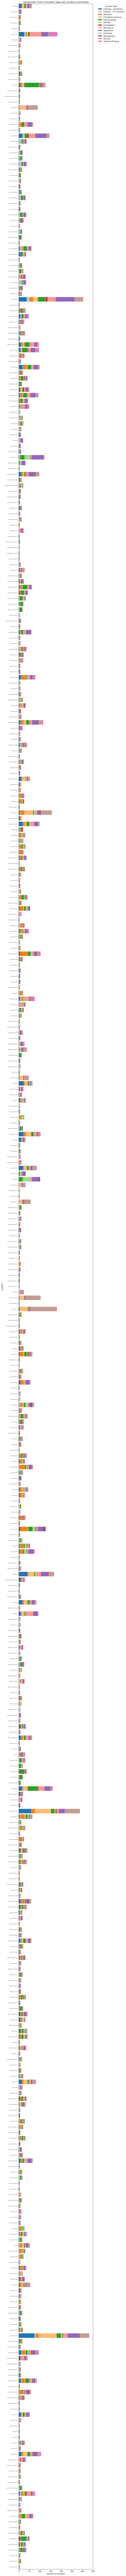

In [61]:
fig, ax = plt.subplots(figsize=(10, 200))

# Track cumulative values for stacking
left = pd.Series([0]*len(df_wide), index=df_wide.index)

colors = plt.cm.tab20.colors

# Loop through incident types
for i, incident in enumerate(df_wide.columns):
    ax.barh(df_wide.index, df_wide[incident],
            left=left,
            label=incident,
            color=colors[i % len(colors)])
    left += df_wide[incident]

# Labels and legend
ax.set_ylabel('Location')
ax.set_xlabel('Number of Incidents')
ax.set_title('Stacked Bar Chart of Incident Types per Location (Horizontal)')
ax.legend(title='Incident Type', bbox_to_anchor=(1.05, 1), loc='upper left')

ax.tick_params(axis='y', labelsize=4)

plt.xlim(0, 350)
ax.margins(y=0) 

plt.tight_layout()
plt.show()